In [1]:
from number_graph import build_number_graph
from utils import name_numbers, describe_node, get_roots, get_parents
import networkx as nx
number_graph = nx.DiGraph()
build_number_graph(number_graph,include_zero=False)

In [2]:
from number_graph import add_all_solutions
add_all_solutions(number_graph, range(0, 41))

In [3]:
number_graph.nodes(data=True)[("2-2-6")]

{'solutions': {0: 1,
  1: 1,
  2: 2,
  3: 0,
  4: 1,
  5: 2,
  6: 6,
  7: 1,
  8: 1,
  9: 0,
  10: 3,
  11: 0,
  12: 0,
  13: 0,
  14: 1,
  15: 0,
  16: 1,
  17: 0,
  18: 0,
  19: 0,
  20: 0,
  21: 0,
  22: 0,
  23: 0,
  24: 2,
  25: 0,
  26: 0,
  27: 0,
  28: 0,
  29: 0,
  30: 0,
  31: 0,
  32: 0,
  33: 0,
  34: 0,
  35: 0,
  36: 0,
  37: 0,
  38: 0,
  39: 0,
  40: 0},
 'rank': 3}

In [4]:
viability = {target:{"roots":len(get_roots(number_graph,str(target))), "parents":len(get_parents(number_graph,str(target)))} for target in range(40)}

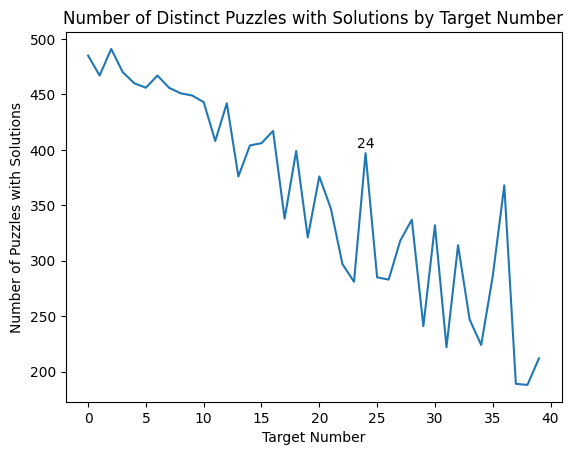

In [5]:
highly_divisible = [6,12,24,36]
import matplotlib.pyplot as plt
plt.plot(viability.keys(), [viability[t]["roots"] for t in viability.keys()], label="Roots")
#plt.plot(viability.keys(), [viability[t]["parents"] for t in viability.keys()], label="Parents")
#plt.scatter(highly_divisible, [viability[t]["roots"] for t in highly_divisible], color="red")
plt.text(24, viability[24]["roots"]+5, "24", ha='center')
plt.xlabel("Target Number")
plt.ylabel("Number of Puzzles with Solutions")
plt.title("Number of Distinct Puzzles with Solutions by Target Number")
plt.show()

In [6]:
all_roots = [node for node in number_graph.nodes if number_graph.in_degree(node)==0]
print(f"Total root nodes: {len(all_roots)}")

Total root nodes: 495


In [7]:
all_rank_4 = [node for node in number_graph.nodes if number_graph.nodes[node]["rank"]==4]
print(f"Total root nodes: {len(all_rank_4)}")

Total root nodes: 495


In [8]:
# For a single value
def integer_factors(n):
    return [i for i in range(1, n+1) if n % i == 0]

# For a list of values
factors_dict = {v: integer_factors(v) for v in range(1, 41)}
for pos,primes in factors_dict.items():
    print(f"{pos}:\t {",".join(map(str,primes))}")

1:	 1
2:	 1,2
3:	 1,3
4:	 1,2,4
5:	 1,5
6:	 1,2,3,6
7:	 1,7
8:	 1,2,4,8
9:	 1,3,9
10:	 1,2,5,10
11:	 1,11
12:	 1,2,3,4,6,12
13:	 1,13
14:	 1,2,7,14
15:	 1,3,5,15
16:	 1,2,4,8,16
17:	 1,17
18:	 1,2,3,6,9,18
19:	 1,19
20:	 1,2,4,5,10,20
21:	 1,3,7,21
22:	 1,2,11,22
23:	 1,23
24:	 1,2,3,4,6,8,12,24
25:	 1,5,25
26:	 1,2,13,26
27:	 1,3,9,27
28:	 1,2,4,7,14,28
29:	 1,29
30:	 1,2,3,5,6,10,15,30
31:	 1,31
32:	 1,2,4,8,16,32
33:	 1,3,11,33
34:	 1,2,17,34
35:	 1,5,7,35
36:	 1,2,3,4,6,9,12,18,36
37:	 1,37
38:	 1,2,19,38
39:	 1,3,13,39
40:	 1,2,4,5,8,10,20,40


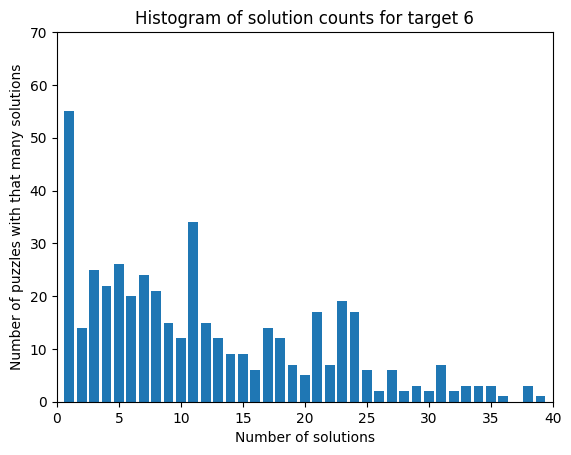

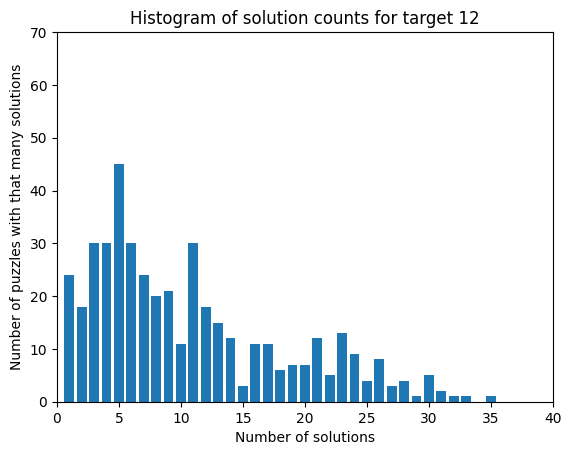

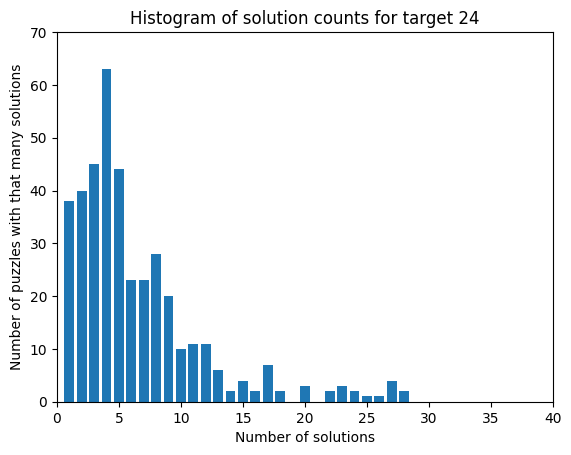

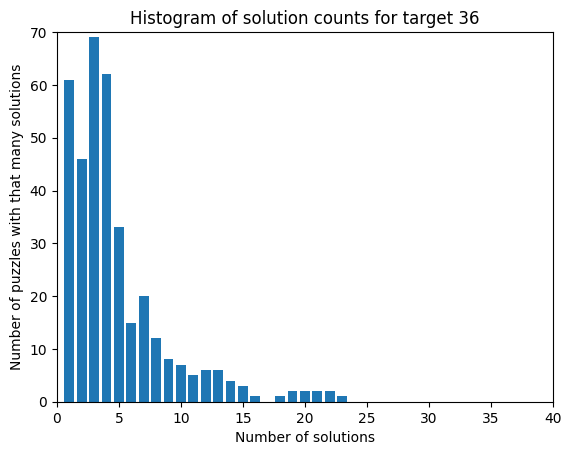

In [17]:
import matplotlib.pyplot as plt
def draw_solution_bar(target):
    all_roots = [node for node in number_graph.nodes if number_graph.in_degree(node)==0]
    solution_counts = {root:number_graph.nodes[root]["solutions"][target] for root in all_roots if target in number_graph.nodes[root]["solutions"] and number_graph.nodes[root]["solutions"][target]>0}
    puzzles_per_solution_count = {}
    for count in solution_counts.values():
        if count not in puzzles_per_solution_count:
            puzzles_per_solution_count[count] = 0
        puzzles_per_solution_count[count] += 1
    plt.bar(puzzles_per_solution_count.keys(), puzzles_per_solution_count.values())
    plt.title(f"Histogram of solution counts for target {target}")
    plt.xlabel("Number of solutions")
    plt.ylabel("Number of puzzles with that many solutions")
    plt.ylim(0, 70)
    plt.xlim(0, 40)
    plt.show()

for x in highly_divisible:
    draw_solution_bar(x)


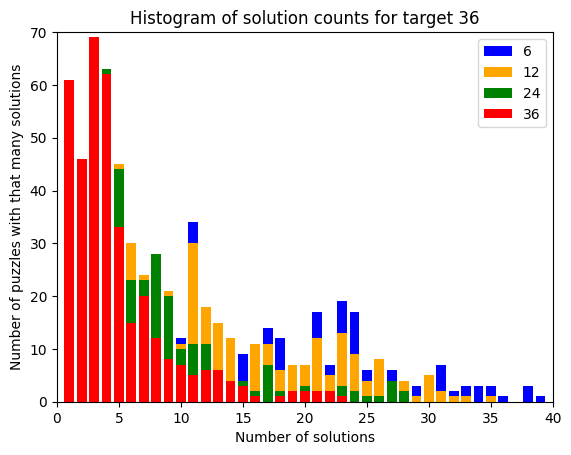

In [20]:
import matplotlib.pyplot as plt
for target,color in zip([6,12,24,36], ["blue","orange","green","red"]):
    all_roots = [node for node in number_graph.nodes if number_graph.in_degree(node)==0]
    solution_counts = {root:number_graph.nodes[root]["solutions"][target] for root in all_roots if target in number_graph.nodes[root]["solutions"] and number_graph.nodes[root]["solutions"][target]>0}
    puzzles_per_solution_count = {}
    for count in solution_counts.values():
        if count not in puzzles_per_solution_count:
            puzzles_per_solution_count[count] = 0
        puzzles_per_solution_count[count] += 1
    plt.bar(puzzles_per_solution_count.keys(), puzzles_per_solution_count.values(),color=color, label=str(target))
plt.title(f"Histogram of solution counts for target {target}")
plt.xlabel("Number of solutions")
plt.ylabel("Number of puzzles with that many solutions")
plt.ylim(0, 70)
plt.xlim(0, 40)
plt.legend()
plt.show()

In [29]:
all_solutions = [node for node in number_graph.nodes if number_graph.nodes[node]["rank"]==4 and number_graph.nodes[node]["solutions"][24]>0]

In [30]:
len(all_solutions)

397

In [44]:
parents = get_parents(number_graph, "24")
parent_counts = {p:len(get_roots(number_graph,p)) for p in parents}
parents_sorted = sorted(parent_counts.items(), key=lambda x: x[1], reverse=True)
parents_sorted[:10]


[('4-6', 201),
 ('3-8', 200),
 ('2-12', 116),
 ('1-24', 79),
 ('6-18', 66),
 ('8-16', 61),
 ('9-15', 57),
 ('4-20', 40),
 ('2-48', 37),
 ('1-25', 36)]

In [51]:
parents_sorted_minimum = []
roots_seen = set()
while len(roots_seen) < viability[24]["roots"]:
    parent_counts = {p:len([root for root in get_roots(number_graph,p) if root not in roots_seen]) for p in parents}
    parents_sorted = sorted(parent_counts.items(), key=lambda x: x[1], reverse=True)
    parent, new_roots_count = parents_sorted[0]
    parents_sorted_minimum.append((parent,new_roots_count))
    roots_seen.update(get_roots(number_graph,parent))
parents_sorted_minimum

[('4-6', 201),
 ('3-8', 95),
 ('6-18', 24),
 ('8-16', 18),
 ('1-25', 12),
 ('2-12', 9),
 ('4-28', 9),
 ('9-15', 6),
 ('10-14', 4),
 ('1-24', 3),
 ('3-27', 3),
 ('2-48', 2),
 ('2-26', 2),
 ('4-20', 2),
 ('6-30', 2),
 ('8-32', 2),
 ('2-22', 1),
 ('6-144', 1),
 ('30-54', 1)]

In [40]:
root_2 = get_roots(number_graph, "2")
[node for node in number_graph.nodes if number_graph.nodes[node]["rank"]==4 and node not in root_2]

['1-1-1-7', '1-1-1-8', '1-1-1-9', '2-5-7-9']

In [57]:
from utils import get_last_steps
get_last_steps(number_graph,"6-8-8-9",24)

['48-72', '6-144']

In [ ]:
trifecta_ends = [name_numbers([3,8]),name_numbers([4,6]),name_numbers([2,12])]
trifecta_roots = []
for end in trifecta_ends:
    describe_node(number_graph, end)

In [6]:
describe_node(number_graph, "3-3-8-8")

Node: 3-3-8-8
  Rank: 4
  Roots: 
  Root Count: 0
  Parents: 
  Parent Count: 0
  Solutions: 0
  Outgoing edges:
    To 6-8-8 via 3+3
    To 0-8-8 via 3-3
    To 8-8-9 via 3*3
    To 1-8-8 via 3/3
    To 3-8-11 via 3+8
    To 3-5-8 via 8-3
    To 3-8-24 via 3*8
    To 3-3-16 via 8+8
    To 0-3-3 via 8-8
    To 3-3-64 via 8*8
    To 1-3-3 via 8/8
  Incoming edges:


In [17]:
len(number_graph.nodes)

4659

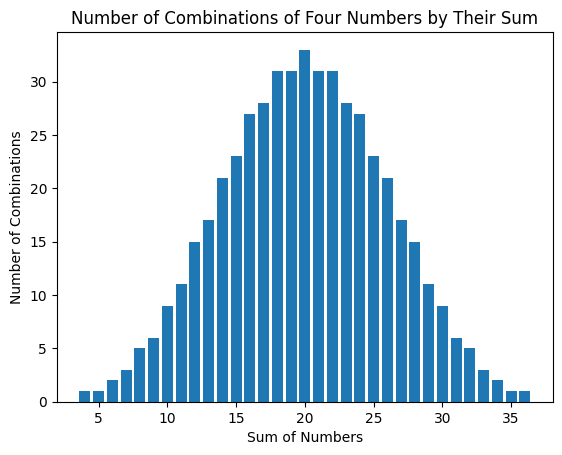

In [3]:
import matplotlib.pyplot as plt
import itertools

vals = {}
start = 1
for combination in itertools.combinations_with_replacement(range(start, 10), 4):
    s = sum(combination)
    if s not in vals:
        vals[s] = 0
    vals[s] += 1
plt.bar(vals.keys(), vals.values())
plt.xlabel("Sum of Numbers")
plt.ylabel("Number of Combinations")
plt.title("Number of Combinations of Four Numbers by Their Sum")
plt.show()